# Handwritten Digit Recognition using Deep Learning

### Dataset Overview
The dataset used in this project is a modified version of the popular **MNIST dataset**. It contains **28x28 pixel grayscale images** of handwritten digits (0 to 9), where each image is flattened into a **784-length vector** (28 × 28 = 784 pixels).

- **train.csv**: Contains labeled data with 785 columns: 
  - The **first column** is the label (digit from 0 to 9).
  - The **next 784 columns** are pixel values ranging from **0 to 255**, representing grayscale intensities of each image pixel.

- **test.csv**: Contains the same 784 pixel features but without the label column. The goal is to predict the labels for these test images.

### Objective
The goal of this project is to Build a deep learning model using a **Multi-Layer Perceptron (MLP)** to recognize handwritten digits.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31976,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

In [5]:
test_df.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.shape

(28000, 784)

## Data Preprocessing

### 1. Check for **Duplicates**

In [7]:
train_df.duplicated().sum()

0

In [8]:
test_df.duplicated().sum()

0

### 2. Check for **Missing values**

In [9]:
train_df.isnull().sum().sum()

0

In [10]:
test_df.isnull().sum().sum()

0

## Exploratory data analysis (EDA)

### Label (Target) distribution

Text(0, 0.5, 'Count')

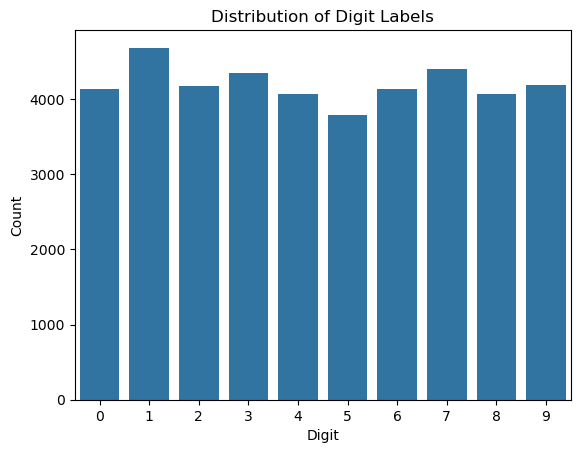

In [11]:
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Digit Labels')
plt.xlabel('Digit')
plt.ylabel('Count')

#### This Figure show that There is **Balance** between Labels (Digits)

### Visualize a sample image

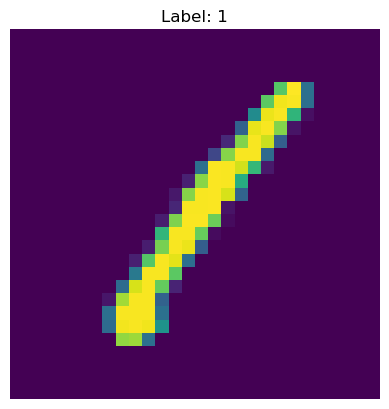

In [12]:
def plot_digit(index):
    image = train_df.iloc[index, 1:].values.reshape(28, 28)
    label = train_df.iloc[index, 0]
    plt.imshow(image)  # cmap='gray'
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

plot_digit(0)

## Feature Engineering

### Data Scaling

In [13]:
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

In [14]:
# Normalize pixel values to [0, 1]
X = X / 255.0

In [15]:
X = X.reshape(-1, 28, 28, 1)

### Data Encoding

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
# One-hot encode labels
y = to_categorical(y, num_classes=10)

### Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

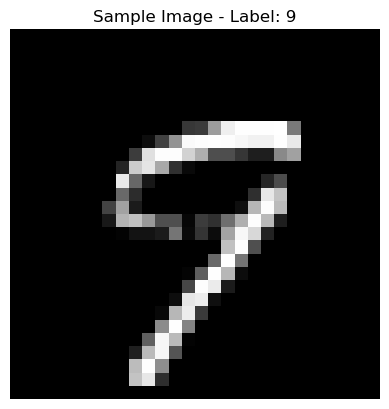

In [20]:
# Show one example
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Sample Image - Label: {np.argmax(y_train[0])}")
plt.axis('off')
plt.show()

## Modelling - Multi-Layer Perceptron (MLP)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Model Building

In [22]:
# Build the MLP model
model = Sequential([
    Input(shape=(28, 28, 1)),           # Define the input shape
    Flatten(),                          # Flatten the 28x28 image
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')     # 10 output classes
])

In [23]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Save the best model during training
checkpoint_cb = ModelCheckpoint("best_mlp_model.keras", save_best_only=True, monitor="val_accuracy", mode="max")

# Stop training early if val_loss doesn’t improve for 5 epochs
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss", mode="min")

In [27]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6413 - loss: 1.1125 - val_accuracy: 0.9340 - val_loss: 0.2237
Epoch 2/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9151 - loss: 0.2968 - val_accuracy: 0.9508 - val_loss: 0.1685
Epoch 3/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9412 - loss: 0.2012 - val_accuracy: 0.9589 - val_loss: 0.1328
Epoch 4/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9560 - loss: 0.1532 - val_accuracy: 0.9611 - val_loss: 0.1298
Epoch 5/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9600 - loss: 0.1309 - val_accuracy: 0.9656 - val_loss: 0.1137
Epoch 6/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9656 - loss: 0.1157 - val_accuracy: 0.9705 - val_loss: 0.1037
Epoch 7/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9704 - loss: 0.1077 - val_accuracy: 0.9688 - val_loss: 0.1012
Epoch 8/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9745 - loss: 0.0860 - val_accura

### Model Evaluation

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0823

Test Accuracy: 0.9752
Test Loss: 0.0925


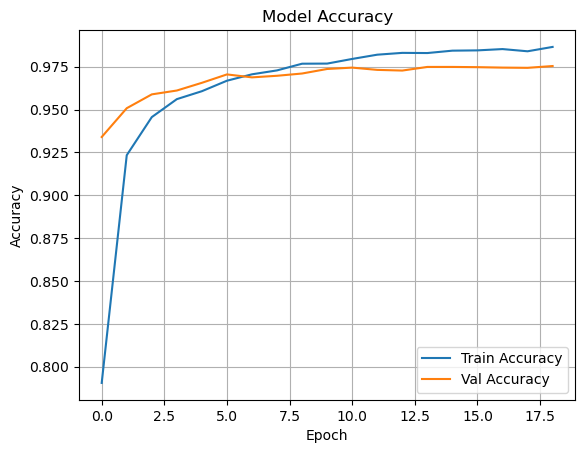

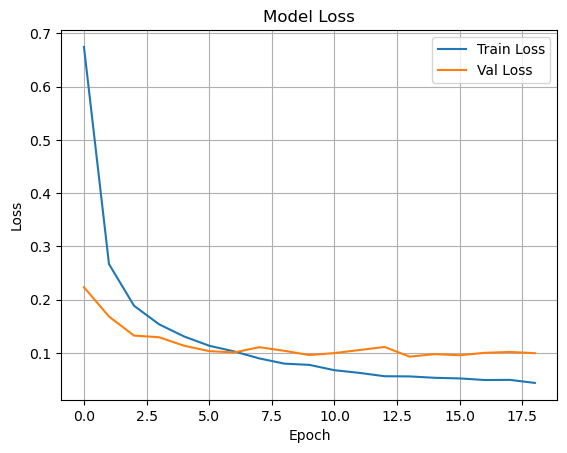

In [29]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       413
           1       1.00      0.98      0.99       468
           2       0.99      0.97      0.98       418
           3       0.97      0.97      0.97       435
           4       0.97      0.98      0.98       407
           5       0.98      0.95      0.96       380
           6       0.99      0.98      0.98       414
           7       0.96      0.99      0.98       440
           8       0.97      0.97      0.97       406
           9       0.95      0.96      0.96       419

    accuracy                           0.98      4200
   macro avg       0.98      0.97      0.98      4200
weighted avg       0.98      0.98      0.98      4200



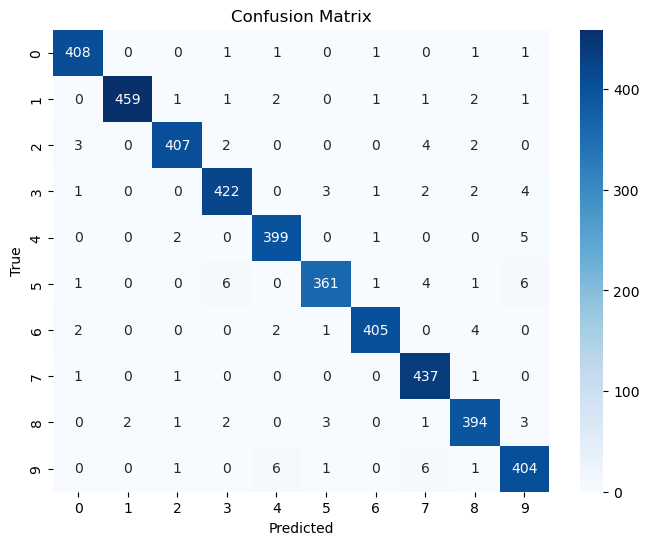

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Model Saving

In [34]:
# Save the trained model
model.save('mlp_model.keras')

## Modelling - Convolutional Neural Network (CNN)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

### Data Augmentation

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [38]:
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

# Normalize pixel values (0-255 → 0-1)
X = X.astype('float32') / 255.0

# Reshape X to image shape (num_samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

In [39]:
# Split into train, val, test (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y.argmax(axis=1)
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp.argmax(axis=1)
)

In [40]:
# x_train = np.expand_dims(x_train, axis=-1)  # shape (60000, 28, 28, 1)
# x_test  = np.expand_dims(x_test, axis=-1)

In [41]:
datagen.fit(X_train)

### Model Building

In [42]:
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [43]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

In [ ]:
# Callbacks
checkpoint_cb = ModelCheckpoint("best_cnn_model.keras", save_best_only=True)
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [45]:
# Train model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50


C:\Users\Mostafa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.6157 - loss: 1.2323 - val_accuracy: 0.1119 - val_loss: 6.3152
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9123 - loss: 0.2800 - val_accuracy: 0.9097 - val_loss: 0.2718
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9419 - loss: 0.1918 - val_accuracy: 0.9852 - val_loss: 0.0514
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9539 - loss: 0.1565 - val_accuracy: 0.9849 - val_loss: 0.0435
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9596 - loss: 0.1367 - val_accuracy: 0.9889 - val_loss: 0.0379
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.9655 - loss: 0.1166 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9660 - loss: 0.1146 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.9721 - loss: 0.1000 - val_accu

### Model Evaluation

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9952 - loss: 0.0238

Test Accuracy: 0.9954
Test Loss: 0.0205


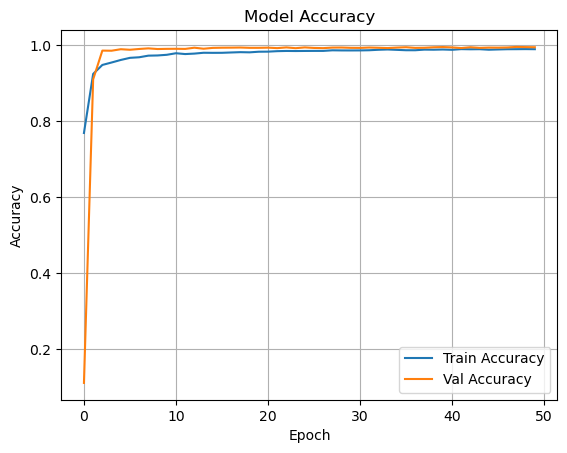

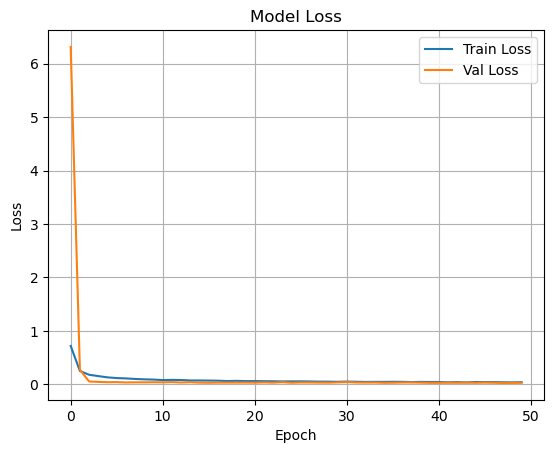

In [47]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [50]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       1.00      1.00      1.00       702
           2       1.00      1.00      1.00       626
           3       1.00      1.00      1.00       653
           4       1.00      1.00      1.00       611
           5       1.00      0.99      1.00       570
           6       1.00      1.00      1.00       621
           7       1.00      1.00      1.00       660
           8       0.98      0.99      0.99       609
           9       0.99      1.00      0.99       628

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



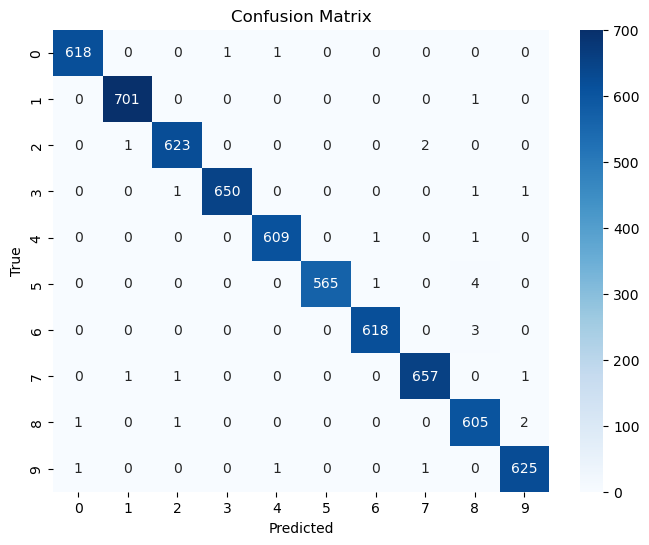

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Model Saving

In [52]:
# Save the trained model
model.save('cnn_model.keras')